# Estegoanálisis

## Prueba y error

* django.bmp LSB1
* titanic.bmp LSBI
* matrix.bmp ?
* budapest.bmp ?

## Estadística

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from collections import Counter
from matplotlib import pyplot as plt

### Tamaño de archivos

In [2]:
stego_dir_path = '../app/in/stegoimages/'
cover_dir_path = '../app/in/coverimages/'

In [3]:
for file in os.listdir(stego_dir_path):
    file_path = os.path.join(stego_dir_path, file)
    image = cv2.imread(file_path)
    height, width, _ = image.shape
    print(f"{file}:\t{os.path.getsize(file_path)} bytes\t{width}x{height} pixels")

django.bmp:	3888054 bytes	1440x900 pixels
titanic.bmp:	2359350 bytes	1024x768 pixels
budapest.bmp:	6220903 bytes	1920x1080 pixels
matrix.bmp:	25421298 bytes	2427x3490 pixels


Dado su tamaño, `matrix.bmp` debería contener el video

In [4]:
for file in os.listdir(cover_dir_path):
    file_path = os.path.join(cover_dir_path, file)
    image = cv2.imread(file_path)
    height, width, _ = image.shape
    print(f"{file}:\t{os.path.getsize(file_path)} bytes\t{width}x{height} pixels")

django.jpg:	503032 bytes	1440x900 pixels
matrix.jpg:	126262 bytes	751x1080 pixels
budapest.jpg:	432748 bytes	1920x1080 pixels
titanic.jpg:	115627 bytes	1024x768 pixels


### Frecuencias

In [5]:
def extract_lsb_bits(image):
    width, height = image.size
    lsb_bits = []

    for y in range(height):
        for x in range(width):
            r, g, b = image.getpixel((x, y))
            lsb_bits.append(r & 1)
            lsb_bits.append(g & 1)
            lsb_bits.append(b & 1)
    
    return lsb_bits

In [6]:
def extract_lsb4_bits(image):
    width, height = image.size
    lsb4_bits = []

    for y in range(height):
        for x in range(width):
            r, g, b = image.getpixel((x, y))
            lsb4_bits.append(r & 0xF)
            lsb4_bits.append(g & 0xF)
            lsb4_bits.append(b & 0xF)
    
    return lsb4_bits

In [7]:
def plot_histogram(bits, title):
    frequency = Counter(bits)
    plt.bar(frequency.keys(), frequency.values(), color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Bit value')
    plt.ylabel('Frequency')
    plt.show()

In [8]:
def analyze_image(image_path, img_name):

    image = Image.open(image_path)

    lsb_bits = extract_lsb_bits(image)
    plot_histogram(lsb_bits, f"{img_name} LSB")

    lsb4_bits = extract_lsb4_bits(image)
    plot_histogram(lsb4_bits, f"{img_name} LSB4")

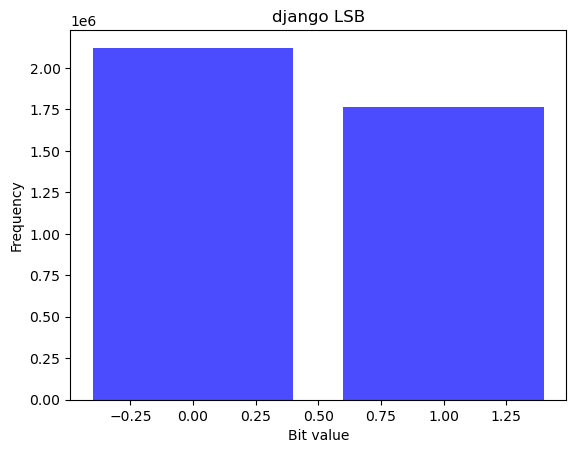

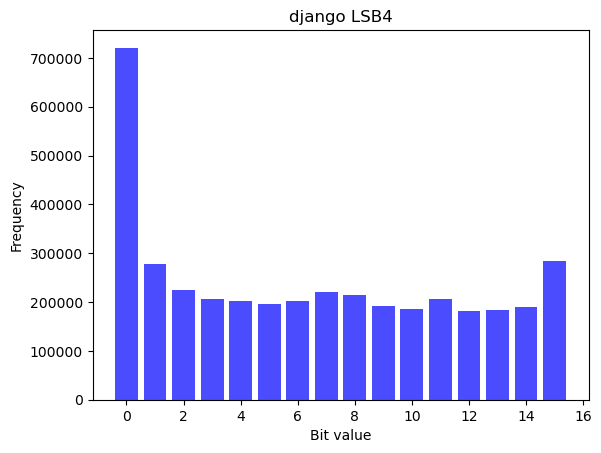

In [9]:
img_name = 'django'
img_path = stego_dir_path + img_name + '.bmp'
analyze_image(img_path, img_name)

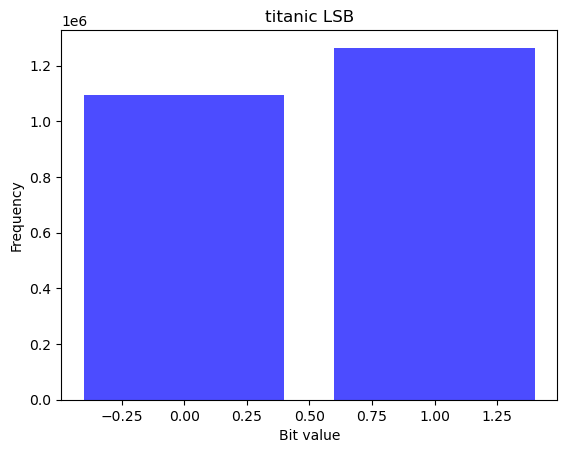

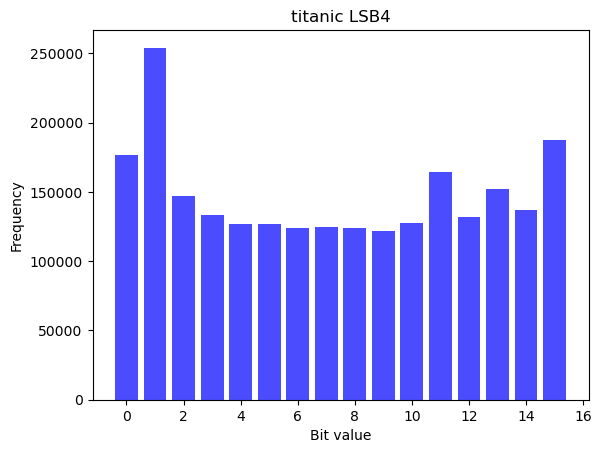

In [10]:
img_name = 'titanic'
img_path = stego_dir_path + img_name + '.bmp'
analyze_image(img_path, img_name)

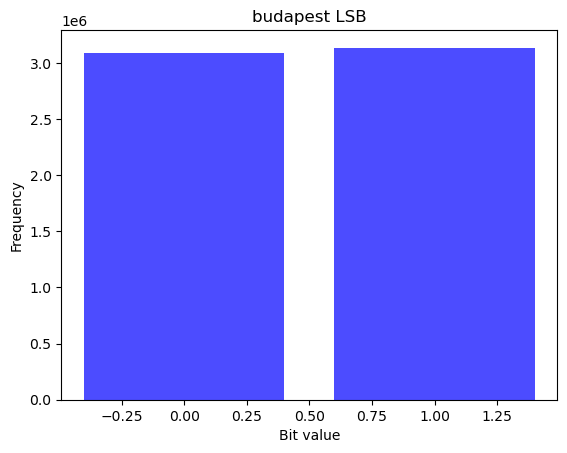

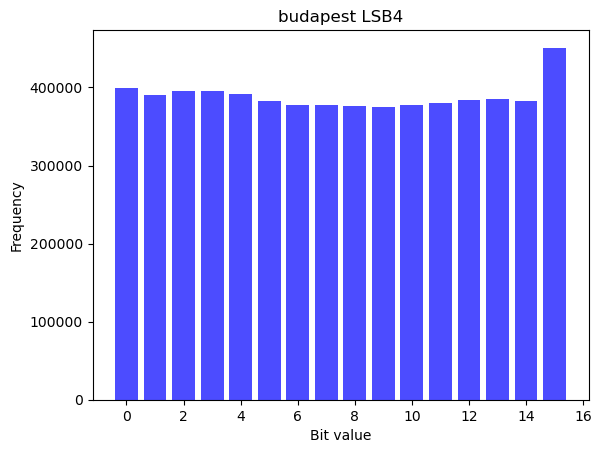

In [11]:
img_name = 'budapest'
img_path = stego_dir_path + img_name + '.bmp'
analyze_image(img_path, img_name)

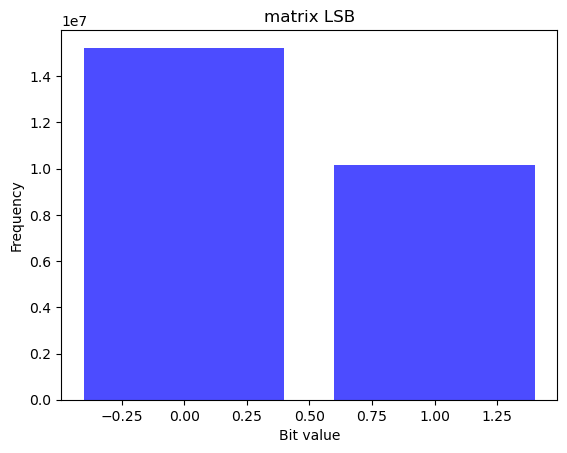

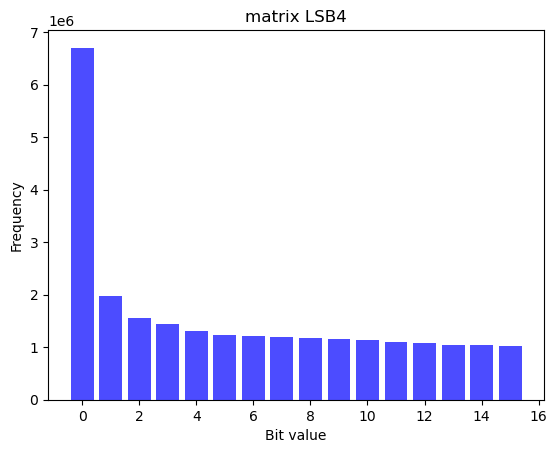

In [12]:
img_name = 'matrix'
img_path = stego_dir_path + img_name + '.bmp'
analyze_image(img_path, img_name)

### Histograma grayscale

Basado en: https://www.researchgate.net/publication/327051261_Comparative_Histogram_Analysis_of_LSB-based_Image_Steganography 

In [13]:
def compare_grayscale_histograms(img_path, img_name, stego_path):
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    stego = cv2.imread(stego_path)
    stego = cv2.cvtColor(stego, cv2.COLOR_BGR2GRAY)
    
    fig = plt.figure(figsize=(14, 7))

    ax1 = plt.subplot(121)
    plt.hist(img.ravel(),256,[0,256])
    plt.grid(axis='y')
    plt.title(f"{img_name} Histogram")

    ax2 = plt.subplot(122, sharey=ax1)
    plt.hist(stego.ravel(),256,[0,256])
    plt.grid(axis='y')
    plt.title(f"stego {img_name} Histogram")

    plt.show()

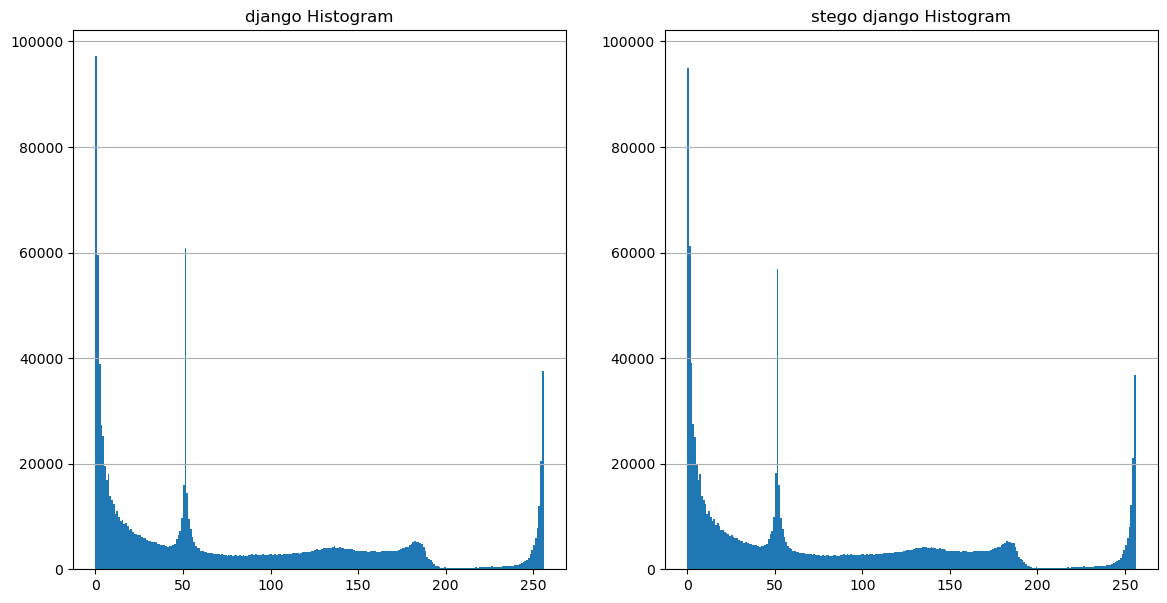

In [14]:
img_name = 'django'
img_path = cover_dir_path + img_name + '.jpg'
stego_path = stego_dir_path + img_name + '.bmp'
compare_grayscale_histograms(img_path, img_name, stego_path)

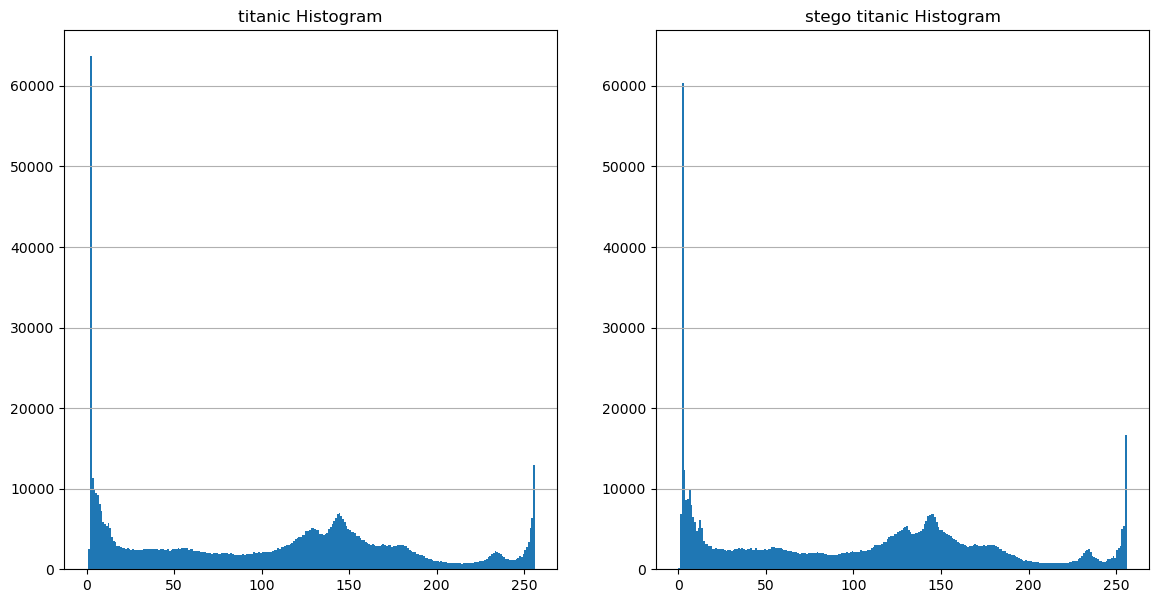

In [15]:
img_name = 'titanic'
img_path = cover_dir_path + img_name + '.jpg'
stego_path = stego_dir_path + img_name + '.bmp'
compare_grayscale_histograms(img_path, img_name, stego_path)

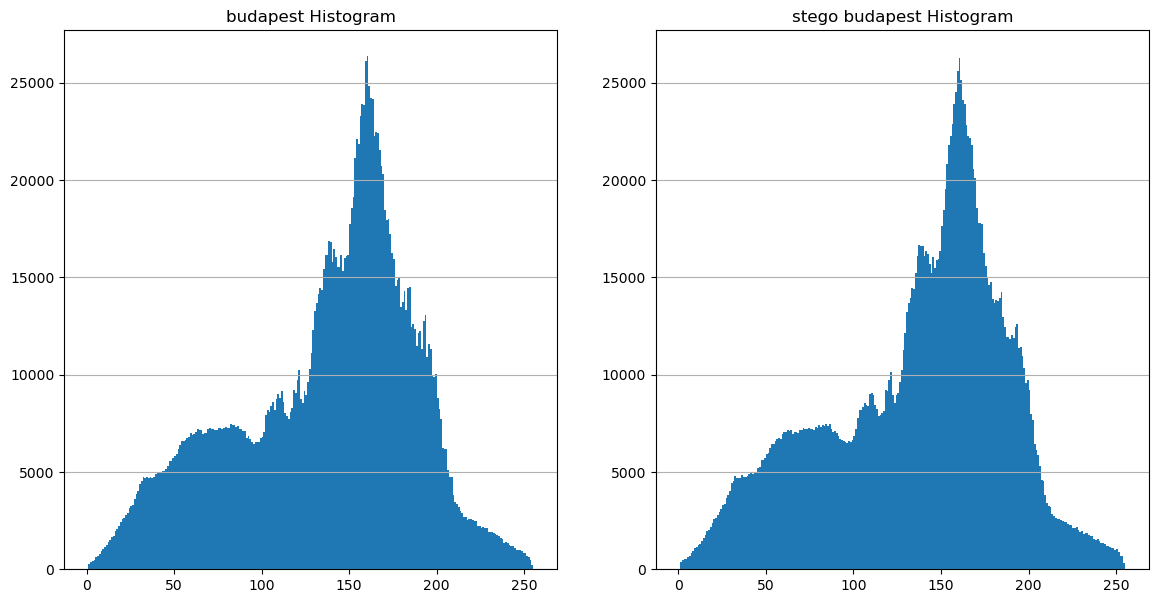

In [16]:
img_name = 'budapest'
img_path = cover_dir_path + img_name + '.jpg'
stego_path = stego_dir_path + img_name + '.bmp'
compare_grayscale_histograms(img_path, img_name, stego_path)

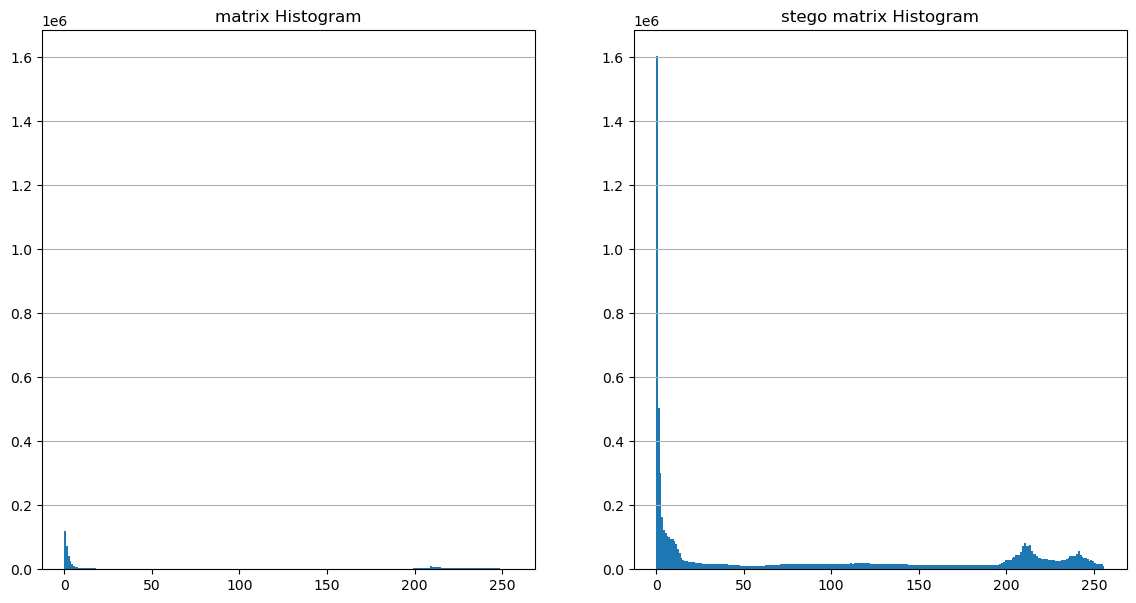

In [17]:
img_name = 'matrix'
img_path = cover_dir_path + img_name + '.jpg'
stego_path = stego_dir_path + img_name + '.bmp'
compare_grayscale_histograms(img_path, img_name, stego_path)

### Histograma canales RGB

In [18]:
def compare_RGB_histograms(img_path, img_name, stego_path):
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_M = np.asarray(img)

    fig = plt.figure(figsize=(8, 30))

    for i in range(1, 4):
        plt.subplot(6, 1, (i-1)*2+1)
        plt.hist(img_M[:, :, i-1].ravel(),256,[0,256])
        plt.grid(axis='y')
        channel = 'RED' if i == 1 else 'GREEN' if i == 2 else 'BLUE'
        plt.title(f"{img_name} Histogram {channel}")
    
    stego = cv2.imread(stego_path)
    stego = cv2.cvtColor(stego, cv2.COLOR_BGR2RGB)
    stego_M = np.asarray(stego)

    for i in range(1, 4):
        plt.subplot(6, 1, i*2)
        plt.hist(stego_M[:, :, i-1].ravel(),256,[0,256])
        plt.grid(axis='y')
        channel = 'RED' if i == 1 else 'GREEN' if i == 2 else 'BLUE'
        plt.title(f"stego {img_name} Histogram {channel}")

    plt.show()

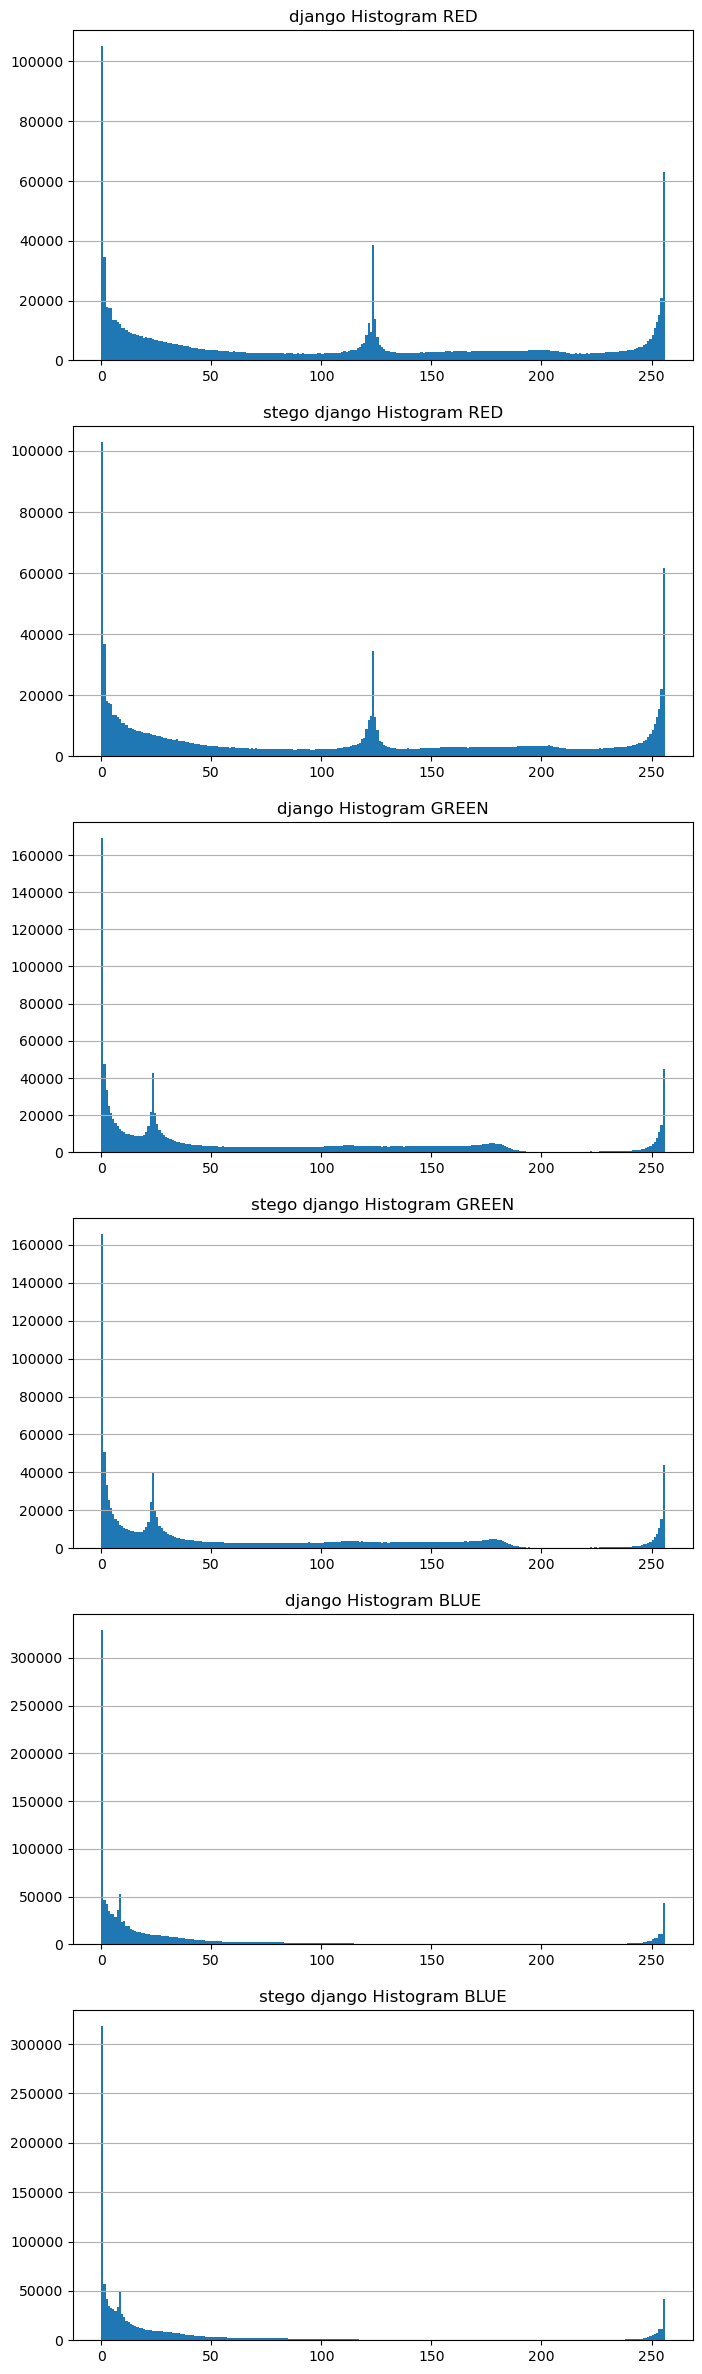

In [19]:
img_name = 'django'
img_path = cover_dir_path + img_name + '.jpg'
stego_path = stego_dir_path + img_name + '.bmp'
compare_RGB_histograms(img_path, img_name, stego_path)

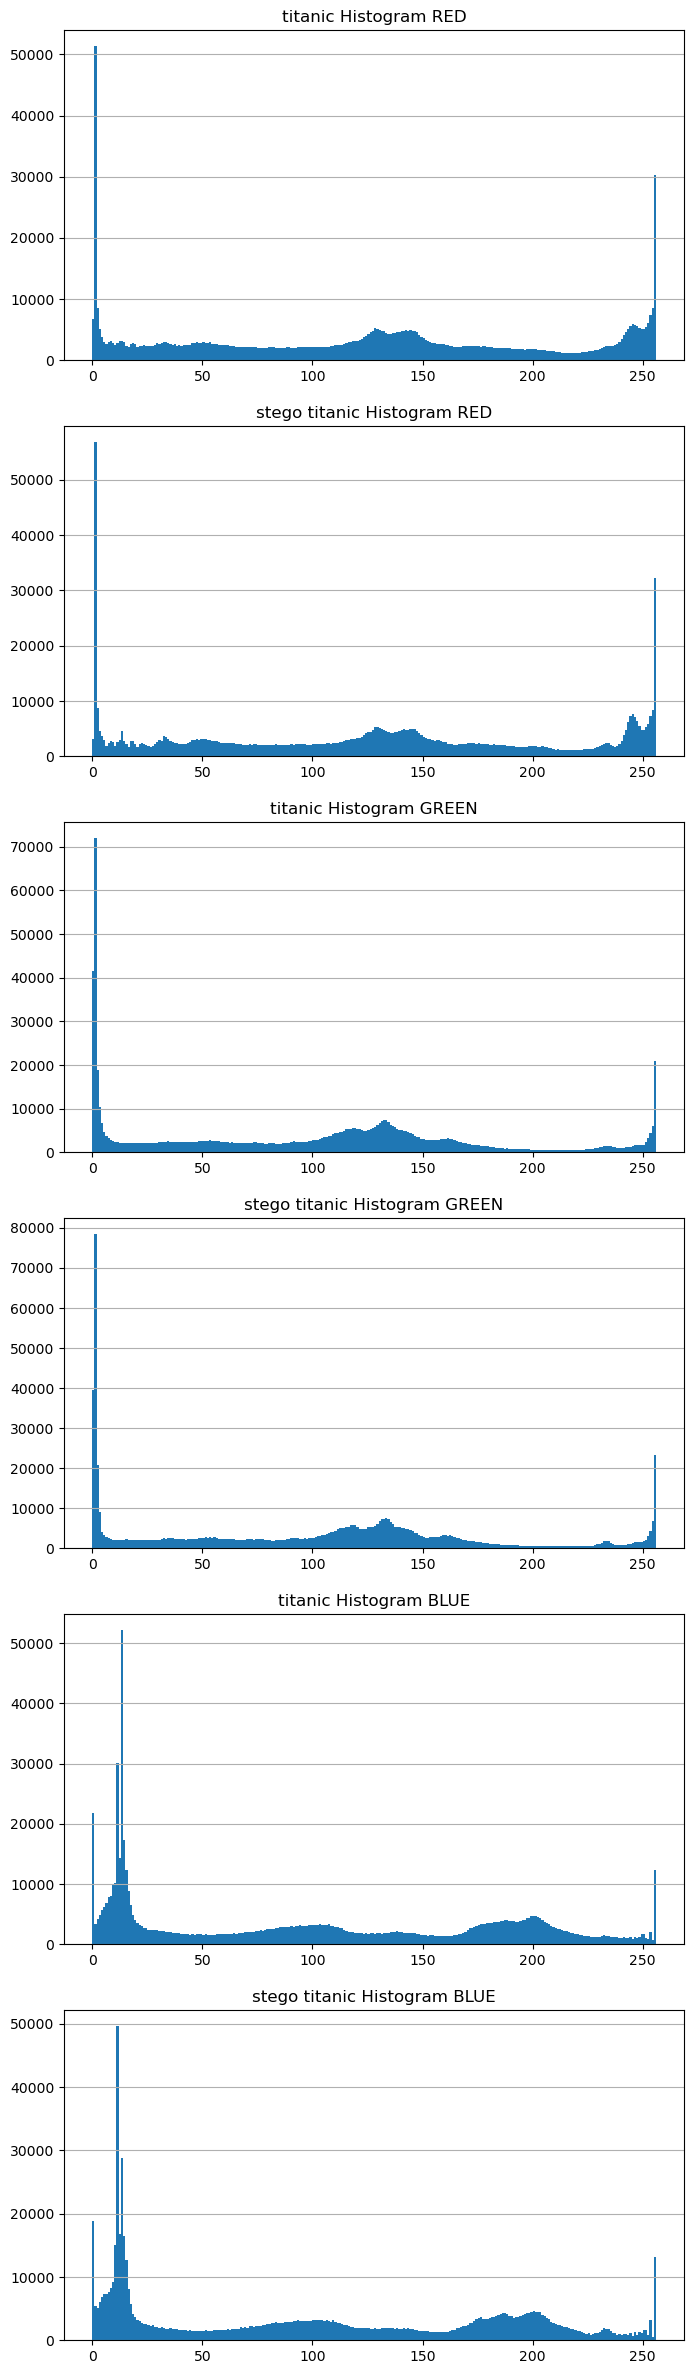

In [20]:
img_name = 'titanic'
img_path = cover_dir_path + img_name + '.jpg'
stego_path = stego_dir_path + img_name + '.bmp'
compare_RGB_histograms(img_path, img_name, stego_path)

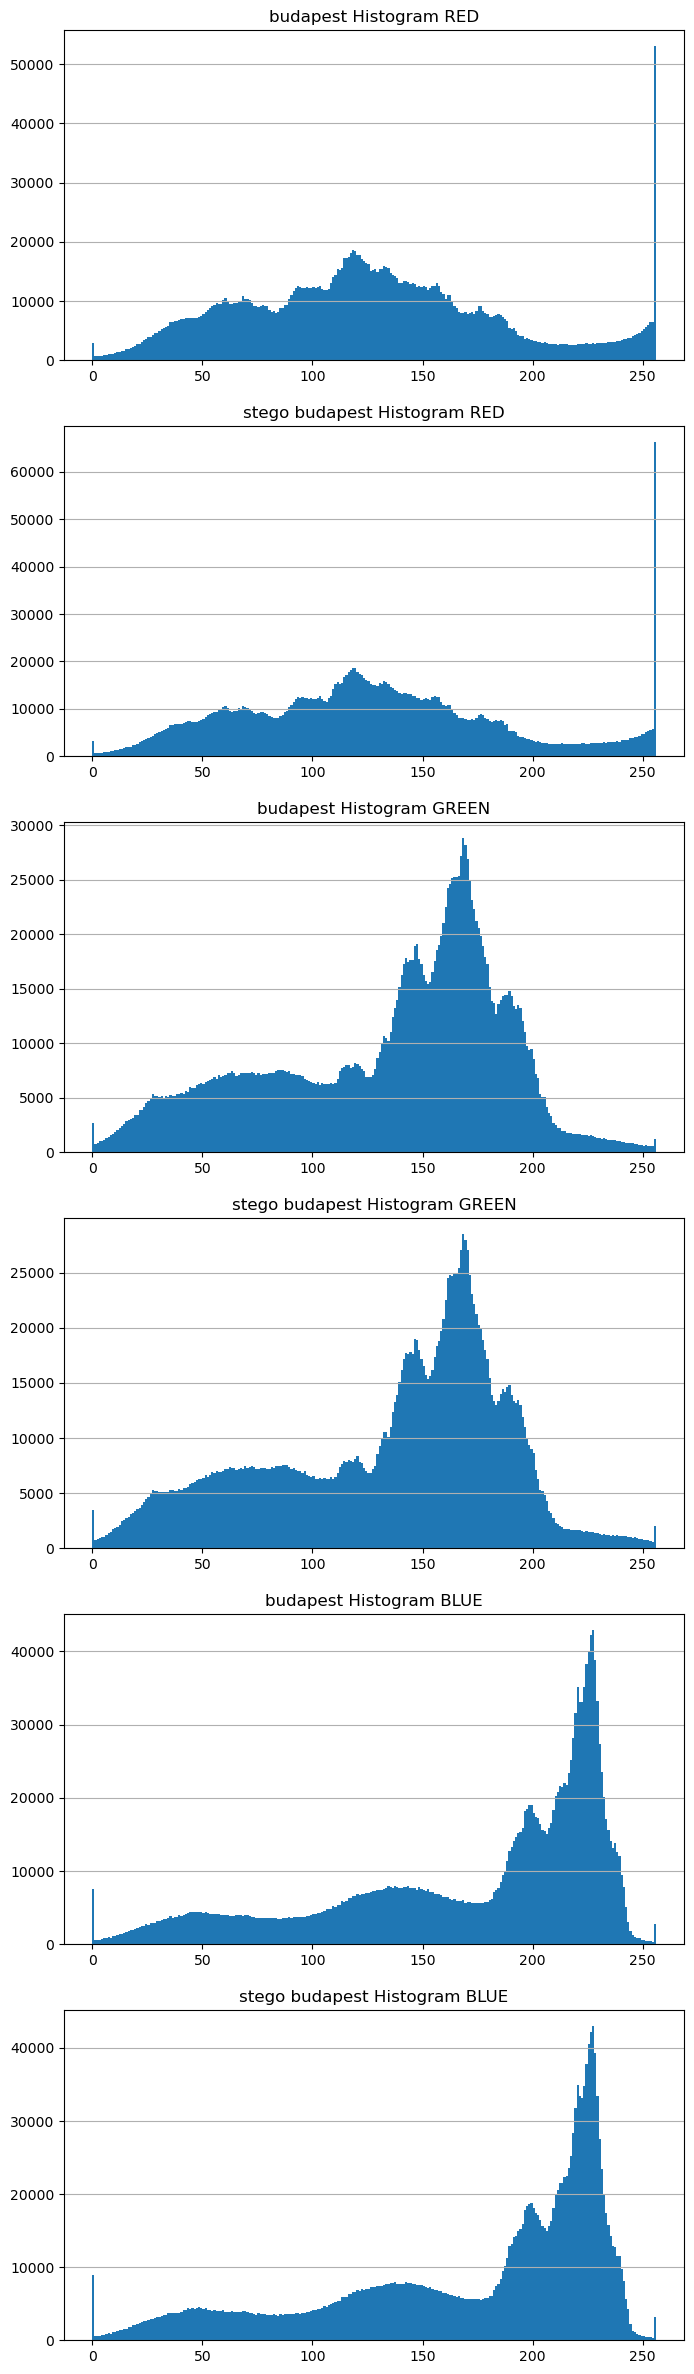

In [21]:
img_name = 'budapest'
img_path = cover_dir_path + img_name + '.jpg'
stego_path = stego_dir_path + img_name + '.bmp'
compare_RGB_histograms(img_path, img_name, stego_path)

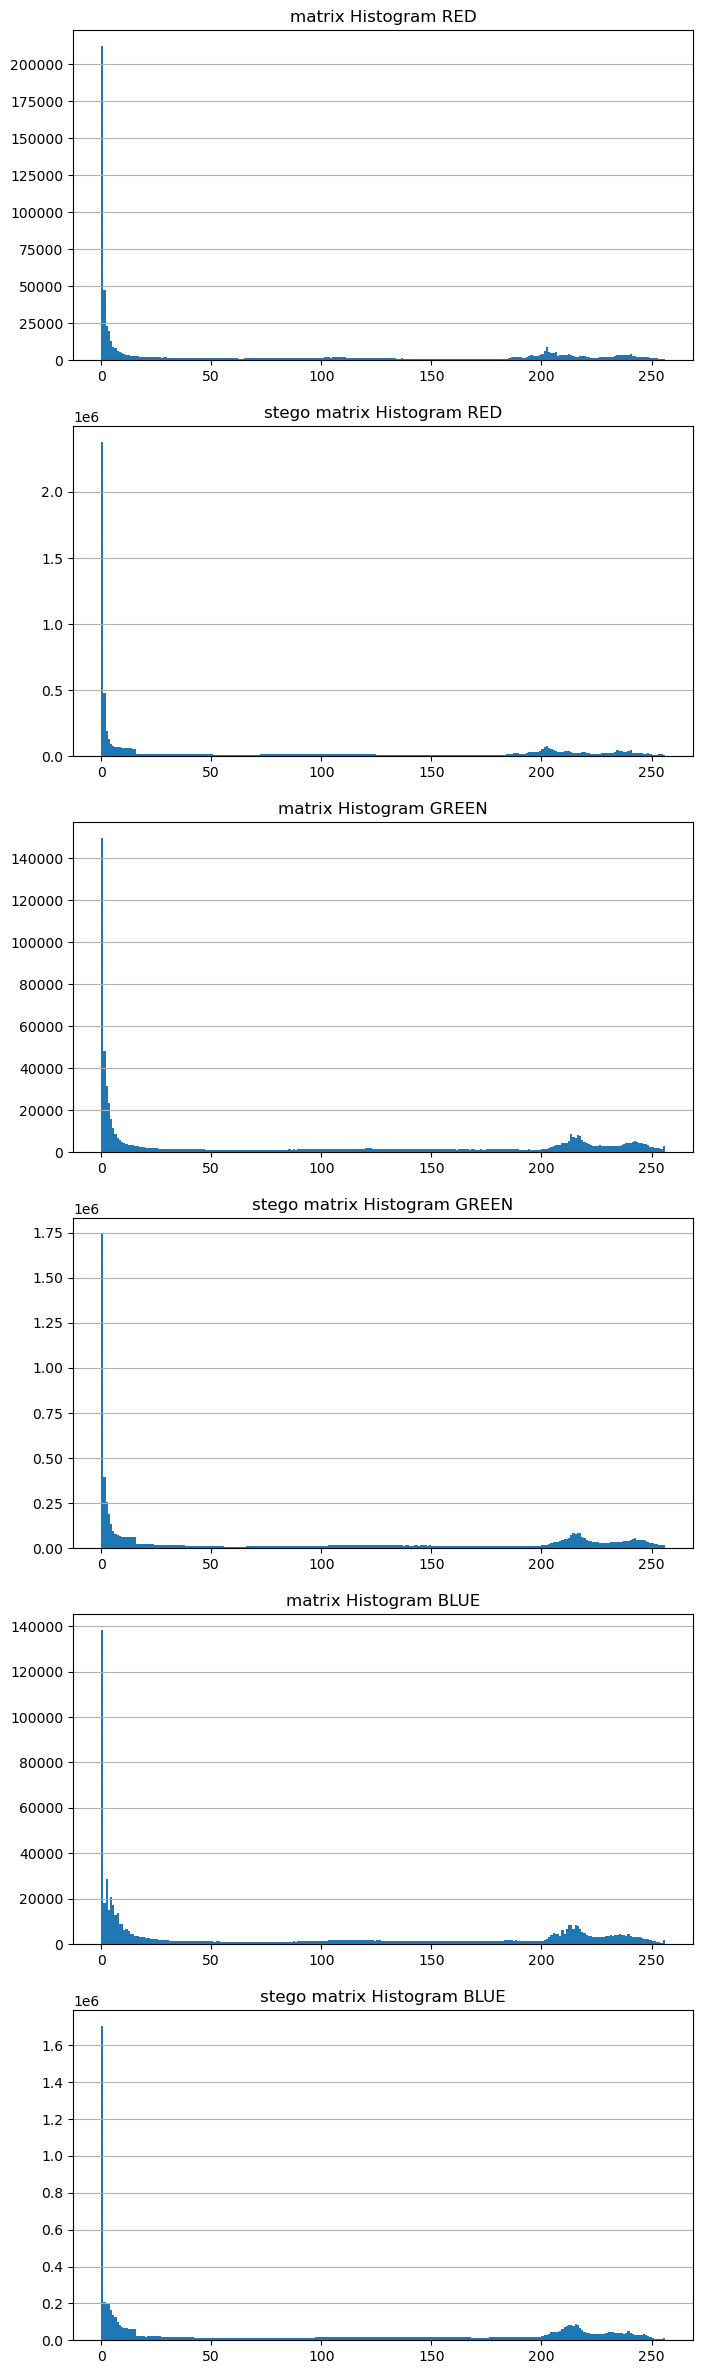

In [23]:
img_name = 'matrix'
img_path = cover_dir_path + img_name + '.jpg'
stego_path = stego_dir_path + img_name + '.bmp'
compare_RGB_histograms(img_path, img_name, stego_path)